In [4]:
import numpy as np
import pylab as pl
import scipy as sp


#trial 2 change: f 0.1 -> 0.9
#trial 3 change>: f 0.1 -> 0.5
#trial 4 change: mean_false 201 -> 120
#trial 5 change: stdev_false 2 -> 20
mean_real = 200
mean_false = 201
stdev_real = 2
stdev_false = 2
f = 0.1

# graphing probabilities
# def introduces a method
def phi_real(o,mean,stddev):
	return np.exp(-(o-mean)**2/(2*stddev**2))/np.sqrt(2*np.pi*stddev**2)
def phi_false(o,mean,stddev):
    return np.exp(-(o-mean)**2/(2*stddev**2))/np.sqrt(2*np.pi*stddev**2)

def generate_environment(T=1000,f=f,vector_size = 120):
    # 1. Randomly decide if we are hallucinating or not
    # 2. If hallucinating, draw an observation from a normal distribution specified by phi_false
    # 3. If not, draw an observation from a normal distribution specified by phi_real
    # 4. add this observation to the list of observations.
    observations = []

    # choose if we are hallucinating or not
    u = np.random.binomial(n=1,p=f,size=T)
    #print(type(u))
    for t in range(T):
        vector = []
        # do an if statement to "case it out"
        if u[t]==0:
            # draw from real()
            for v in range(vector_size):
                o = np.random.normal(mean_real,stdev_real)
                vector.append(o)
        else:
            # draw from false
            for v in range(vector_size):
                o = np.random.normal(mean_false,stdev_false)
                vector.append(o)
        observations.append(vector)
    return observations, u

observations, u = generate_environment()

In [5]:
def classify(observations):
    #define observations
    o = observations
    results = np.zeros(0, dtype = np.bool)
    

    for v in o:
        L = (1-f)/f
        for vt in v:
            L *= phi_real(np.asarray(vt),mean_real,stdev_real)/phi_false(np.asarray(vt),mean_false,stdev_false)
        #print(L>1)
        results = np.append(results,L>1)

    return results

 

In [6]:
#determine # of errors
from sklearn.metrics import accuracy_score

def acc_rate(y_pred = classify(observations), y_true = u):
    accuracy_score(y_true, y_pred)
    foo = accuracy_score(y_true, y_pred, normalize=False)
    return 100-(100*foo/1000)
#foo is the inverse of what it should be because u_real represented as 0, while c_real represented as True; accuracy counts discrepancies of u, c
print(acc_rate())




99.7


In [7]:
c = classify(observations)

print(len(u[u==0]),len(c[c==True]))
print(acc_rate())
#print(len(u[u==0]),len(c_s[c_s==1]))
#print(acc_rate(c_s))

#true positive
def tpr(c = c):
    cr = u[c==True]
    #print(len(cr))
    ur_cr  = cr[cr == 0]
    return len(ur_cr)/len(u[u == 0])
#false positive
def fpr(c = c):
    cr = u[c==True]
    #print(len(cr))
    uf_cr  = cr[cr == 1]
    return len(uf_cr)/len(u[u == 1])
#false negative
def fnr(c = c):
    cf = u[c==False]
    ur_cf  = cf[cf == 0]
    return len(ur_cf)/len(u[u == 0])
print (tpr(), fpr(), fnr())
#print (tpr(c_s), fpr(c_s), fnr(c_s))

895 896
99.7
0.9988826815642458 0.01904761904761905 0.0011173184357541898


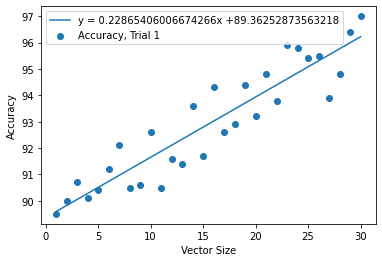

In [28]:
# np.linspace defines x axis of line graph; 1000 means 1000 intervals (resolution of plot)

size = 30
x = np.linspace(1,size,size)
y1 = np.zeros(size)
#y5 = np.zeros(size)

for t in range(size):
    obs, y_t = generate_environment(vector_size = t+1)
    y1[t] = acc_rate(classify(obs),y_t)

    #stdev_false = 20
    #obs, y_t = generate_environment(vector_size = t+1)
    #y5[t] = acc_rate(classify(obs),y_t)

pl.scatter(x,y1, label = "Accuracy, Trial 1")

#regression line
m, b = np.polyfit(x, y1, 1)
pl.plot(x, m*x + b, label = "y = "+str(m)+"x +"+str(b))

pl.legend(loc = "best")
pl.ylabel("Accuracy")
pl.xlabel ("Vector Size")
pl.show()